In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("IBMStock.csv",low_memory=False,parse_dates=True,dayfirst=True)

In [3]:
df

,Date,StockPrice
0,1/1/70,360.319048
1,2/1/70,346.723684
2,3/1/70,327.345714
3,4/1/70,319.852727
4,5/1/70,270.375238
...,...,...
475,8/1/09,118.430952
476,9/1/09,119.055714
477,10/1/09,122.239546
478,11/1/09,125.273500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        480 non-null    object 
 1   StockPrice  480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        480 non-null    datetime64[ns]
 1   StockPrice  480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [7]:
pd.date_range(start='1970-01-01',end='1970-01-31',freq='D')

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10', '1970-01-11', '1970-01-12',
               '1970-01-13', '1970-01-14', '1970-01-15', '1970-01-16',
               '1970-01-17', '1970-01-18', '1970-01-19', '1970-01-20',
               '1970-01-21', '1970-01-22', '1970-01-23', '1970-01-24',
               '1970-01-25', '1970-01-26', '1970-01-27', '1970-01-28',
               '1970-01-29', '1970-01-30', '1970-01-31'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pd.date_range(start='1970-01-01',end='1970-06-30',freq='W')

DatetimeIndex(['1970-01-04', '1970-01-11', '1970-01-18', '1970-01-25',
               '1970-02-01', '1970-02-08', '1970-02-15', '1970-02-22',
               '1970-03-01', '1970-03-08', '1970-03-15', '1970-03-22',
               '1970-03-29', '1970-04-05', '1970-04-12', '1970-04-19',
               '1970-04-26', '1970-05-03', '1970-05-10', '1970-05-17',
               '1970-05-24', '1970-05-31', '1970-06-07', '1970-06-14',
               '1970-06-21', '1970-06-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [9]:
pd.date_range(start='1970-01-01',end='1970-12-31',freq='M')

DatetimeIndex(['1970-01-31', '1970-02-28', '1970-03-31', '1970-04-30',
               '1970-05-31', '1970-06-30', '1970-07-31', '1970-08-31',
               '1970-09-30', '1970-10-31', '1970-11-30', '1970-12-31'],
              dtype='datetime64[ns]', freq='M')

In [10]:
pd.date_range(start='1970-01-01',end='2009-12-31',freq='Y')

DatetimeIndex(['1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31',
               '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31',
               '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31',
               '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [11]:
pd.date_range(start='1970-01-01',end='2009-12-31',freq='Q')

DatetimeIndex(['1970-03-31', '1970-06-30', '1970-09-30', '1970-12-31',
               '1971-03-31', '1971-06-30', '1971-09-30', '1971-12-31',
               '1972-03-31', '1972-06-30',
               ...
               '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30',
               '2008-09-30', '2008-12-31', '2009-03-31', '2009-06-30',
               '2009-09-30', '2009-12-31'],
              dtype='datetime64[ns]', length=160, freq='Q-DEC')

In [12]:
pd.date_range(start='1970-01-01',end='2009-12-31',freq='QS')

DatetimeIndex(['1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-01', '1972-04-01',
               ...
               '2007-07-01', '2007-10-01', '2008-01-01', '2008-04-01',
               '2008-07-01', '2008-10-01', '2009-01-01', '2009-04-01',
               '2009-07-01', '2009-10-01'],
              dtype='datetime64[ns]', length=160, freq='QS-JAN')

In [13]:
df['Day'] = df['Date'].dt.day

In [14]:
df['Month'] = df['Date'].dt.month

In [15]:
df['Year'] = df['Date'].dt.year

In [16]:
df

,Date,StockPrice,Day,Month,Year
0,1970-01-01,360.319048,1,1,1970
1,1970-02-01,346.723684,1,2,1970
2,1970-03-01,327.345714,1,3,1970
3,1970-04-01,319.852727,1,4,1970
4,1970-05-01,270.375238,1,5,1970
...,...,...,...,...,...
475,2009-08-01,118.430952,1,8,2009
476,2009-09-01,119.055714,1,9,2009
477,2009-10-01,122.239546,1,10,2009
478,2009-11-01,125.273500,1,11,2009


In [17]:
df2 = df.groupby(by='Year',axis=0).mean()

In [18]:
df2

,StockPrice,Day,Month
Year,,,
1970,297.671619,1.0,6.5
1971,321.866187,1.0,6.5
1972,387.582317,1.0,6.5
1973,344.528623,1.0,6.5
1974,208.208603,1.0,6.5
1975,202.837410,1.0,6.5
1976,264.649662,1.0,6.5
1977,265.364962,1.0,6.5
1978,267.973365,1.0,6.5


In [19]:
df2.reset_index(inplace=True)

In [20]:
df2

,Year,StockPrice,Day,Month
0,1970,297.671619,1.0,6.5
1,1971,321.866187,1.0,6.5
2,1972,387.582317,1.0,6.5
3,1973,344.528623,1.0,6.5
4,1974,208.208603,1.0,6.5
5,1975,202.837410,1.0,6.5
6,1976,264.649662,1.0,6.5
7,1977,265.364962,1.0,6.5
8,1978,267.973365,1.0,6.5
9,1979,168.633882,1.0,6.5


### Data Visualization

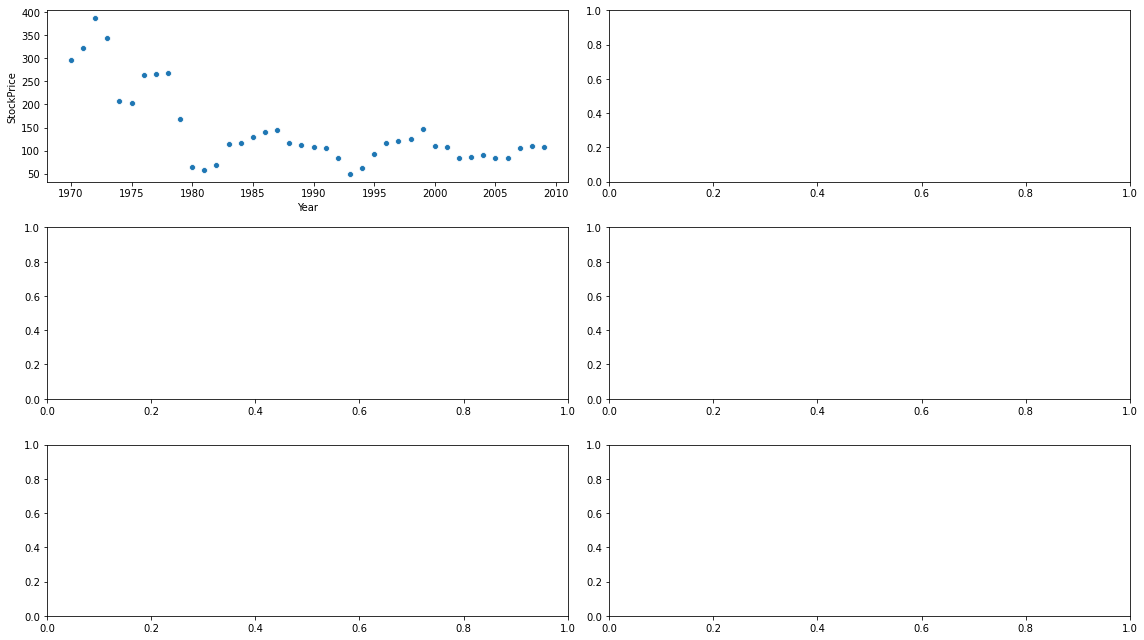

In [21]:
fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
sns.scatterplot(df2.Year,df2.StockPrice)
plt.subplot(3,2,2)

plt.subplot(3,2,3)

plt.subplot(3,2,4)

plt.subplot(3,2,5)

plt.subplot(3,2,6)

plt.tight_layout()
plt.show()